In [28]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀-예측 
from sklearn.model_selection import train_test_split 
                                    # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

특성을 하나로만 하진 않아. 특성값들을 더 늘려

In [29]:
# numpy 구조로 변환(numpy로 묶기)
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

0값 있는지, (그래프의)직선의 모양이 어떤지를 확인

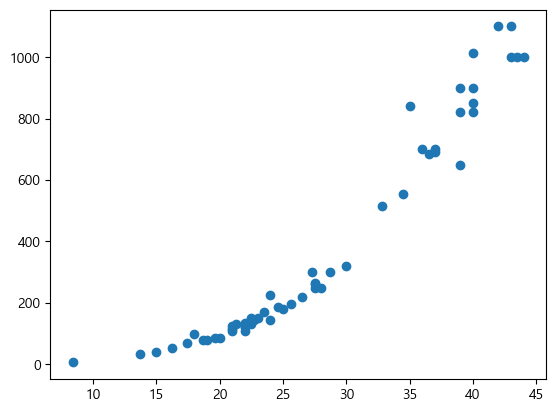

In [30]:
# 그래프 구현 ==> 0 데이터 있는지 확인, 그래프 모양 확인(직선에 가까운지 등)
plt.scatter(perch_length, perch_weight)

In [31]:
# 데이터 전처리
# random_state=42 : 랜덤으로 섞는 것을 고정시켜 예측률도 고정됨.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
    )

In [32]:
# 데이터 전처리
# 이전에 연습한 train_input은 2가지 이상의 행렬로 구성 ==> 2차원 행렬로 구성 ==> reshape 안했음.
# 1차원 train_input, test_input ==> 2차원 행렬로 변환
# 2개 이상의 특성값을 가지면 2차원 행렬이 되어 reshape을 하지 않아도 됨. 할 필요 없음.
train_input = train_input.reshape(-1,1)
train_input
test_input = test_input.reshape(-1,1)
test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [33]:
# 데이터 훈련 시키기
knr = KNeighborsRegressor() # knn 회귀 - 예측 알고리즘을 사용 
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [34]:
predict = knr.predict(test_input)
print("예측 값 : ", predict)

예측 값 :  [  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


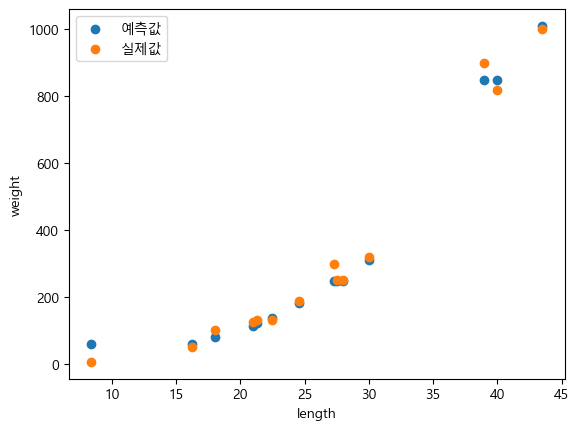

In [35]:
plt.scatter(test_input, predict, label='예측값') # 파란색
plt.scatter(test_input, test_target, label='실제값') # 주황색
plt.xlabel("length")
plt.ylabel('weight')
plt.legend(loc=0)

In [39]:
# train 예측률
score = knr.score(train_input, train_target)
print("train 예측률 : ", score) # train 예측률 :  0.9698823289099254
# test 예측률
score = knr.score(test_input, test_target)
print("test 예측률 : ", score) # test 예측률 :  0.992809406101064

# train 예측률 < test 예측률 ==> 과소적합으로 판단 ==> n_neighbors 개수 줄이기

train 예측률 :  0.9698823289099254
test 예측률 :  0.992809406101064


In [40]:
knr.n_neighbors=3 # n_neighbors 5개에서 3개로 줄이기
knr.fit(train_input, train_target) # 데이터 재훈련

KNeighborsRegressor(n_neighbors=3)

In [41]:
# n_neighbors 개수를 5개에서 3개로 줄임
# train 예측률
score = knr.score(train_input, train_target)
print("train 예측률 : ", score) # train 예측률 :  0.9804899950518966
# test 예측률
score = knr.score(test_input, test_target)
print("test 예측률 : ", score)  # test 예측률 :  0.9746459963987609

# train 예측률 > test 예측률

train 예측률 :  0.9804899950518966
test 예측률 :  0.9746459963987609


In [45]:
predict = knr.predict([[16.8]])
print(predict)

[62.66666667]


In [ ]:
# 5부터 5의 배수 45까지 해서 5, 10, 15, 20, 25, 30, 35, 40, 45 길이를 예측해서 선그래프로 출력하시오. 
# train_input, train_target 데이터를 scatter로 출력하시오.

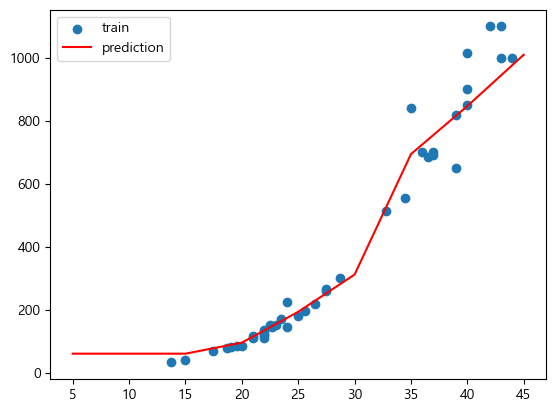

In [56]:
x = np.arange(5,45+1,5).reshape(-1,1)
# x = np.arage([5, 10, 15, 20, 25, 30, 35, 40, 45]).reshape(-1,1)
knr.n_neighbor = 3
knr=KNeighborsRegressor()
knr.fit(train_input, train_target)
predict=knr.predict(x)   
plt.scatter(train_input, train_target, label='train')
plt.plot(x,predict, color='red', label='prediction')
plt.legend(loc=0)